# Support Vector Machine (SVM)

When all samples are correctly classified, that is $c_n = \textrm{sgn}(\hat{\mathbf{w}}^T \hat{\mathbf{v}}_n)$, the margin around the separation line is defined as
\begin{equation}
\min_{n =1,\ldots,N} c_n \frac{\hat{\mathbf{w}}^T \hat{\mathbf{v}}_n}{\| \hat{\mathbf{w}} \|} > 0.
\end{equation}
The Support Vector Machine (SVM) tries to maximize the margin between the two classes.

We use the freedom to rescale $\hat{\mathbf{w}}$ such that $c_n \hat{\mathbf{w}}^T \hat{\mathbf{v}}_n - 1 \geq 0$ for all $n = 1, \ldots N$ with equality for at least one sample. Hence we impose some constraints on $\hat{\mathbf{w}}$. In the case of samples, where we have equality, the constraints are said to be active. For the other samples, they are inactive. Subject to these constraints, maximizing the margin is equivalent to maximizing  $\| \hat{\mathbf{w}} \|^{-1}$. Hence, the equivalent problem is: Minimize the objective function $\| \hat{\mathbf{w}} \|^2/2$ subject to the constraint $c_n \hat{\mathbf{w}}^T \hat{\mathbf{v}}_n -1 \geq 0$ for all $n = 1, \ldots N$. This is called the primal optimization problem.

The Lagrangian function combines the objective function and the constraints into one function. Its form is given by
\begin{equation}
L(\hat{\mathbf{w}}, \boldsymbol{\alpha}) = \frac{1}{2} \| \hat{\mathbf{w}} \|^2 - \sum_{n=1}^N \alpha_n \left( c_n \hat{\mathbf{w}}^T \hat{\mathbf{v}}_n - 1 \right),
\end{equation}
where $\boldsymbol{\alpha} = (\alpha_1, \ldots, \alpha_N)^T$ are known as Lagrange multipliers which are required to be non-negative. If for a particular $\hat{\mathbf{w}}$, the constraint $c_n \hat{\mathbf{w}}^T \hat{\mathbf{v}}_n - 1 \geq 0$ is satisfied as equality, it is zero and does not contribute to the sum. If it is satisfied as a strict inequality, we subtract from the original objective function, but if it is not satisfied, we add to it. Thus, if $\hat{\mathbf{w}}$ lies outside the feasible set, it is penalized by increasing the objective function which needs to be minimized.

The function
\begin{equation}
L(\boldsymbol{\alpha}) = \min_{\hat{\mathbf{w}}} L(\hat{\mathbf{w}}, \boldsymbol{\alpha})
\end{equation}
is called the dual function of the primal optimization problem.

We seek $\boldsymbol{\alpha}$ that maximizes the dual function given by
\begin{equation}
L(\boldsymbol{\alpha}) = \sum_{n=1}^N \alpha_n - \frac{1}{2} \sum_{i=1}^N \sum_{n=1}^N \alpha_i \alpha_n c_i c_n \hat{\mathbf{v}}_i^T \hat{\mathbf{v}}_n.
\end{equation}
subject to the constraints $\alpha_n \geq 0$ and $\alpha_n \left( c_n \hat{\mathbf{w}}^T \hat{\mathbf{v}}_n - 1 \right) = 0$, $n=1,\ldots,N$. This is the dual representation of the maximum margin problem.

Recall that $\hat{\mathbf{w}} = (-b, \mathbf{w})$ and $\mathbf{v}$ to $\hat{\mathbf{v}} = (1, \mathbf{v})$. The bias $b$ is given by $- \sum_{n=1}^N \alpha_n c_n$, while the vector of weights is
\begin{equation}
\mathbf{w} = \sum_{n=1}^N \alpha_n c_n \mathbf{v}_n.
\end{equation}
The dual maximization problem becomes
\begin{equation}
L(\boldsymbol{\alpha}) = \sum_{n=1}^N \alpha_n - \frac{1}{2} \sum_{i=1}^N \sum_{n=1}^N \alpha_i \alpha_n c_i c_n \left( 1 + \mathbf{v}_i^T \mathbf{v}_n \right).
\end{equation}
Its solution depends solely on the inner product between samples. The classification is according to the sign of
\begin{equation}
\hat{\mathbf{w}}^T \hat{\mathbf{v}} = \sum_{n=1}^N \alpha_n c_n \hat{\mathbf{v}}_n^T \hat{\mathbf{v}} = \sum_{n=1}^N \alpha_n c_n \left( 1 + \mathbf{v}_n^T \mathbf{v} \right) = - b + \sum_{n=1}^N \alpha_n c_n \mathbf{v}_n^T \mathbf{v} = -b +\mathbf{w}^T \mathbf{v}.
\end{equation}
Again, this only depends on the inner products between the training samples and the new sample weighted by $\alpha_n$. Since $\alpha_n$ is only non-zero for the support vectors, it is only important how the new sample relates to the support vectors.

Explore the speed as compared to the Perceptron.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

In [2]:
m = datasets.load_iris()
# We consider two species.
# Iris setosa stored in the first 50 entries.
# Iris versicolor stored in the next 50 entries.

# Create a classification instance of the SVM.
s = svm.SVC(kernel="linear", # Resulting in a separation line.
            tol=0.001)       # Stopping criterion.

# We consider sepal length and width, the first and second features.
# We train on the entire data.
s.fit(m.data[0:100, 0:2], m.target[0:100])

# Support vectors:
sv = s.support_vectors_
# Lagrange multipliers:
lm = s.dual_coef_
# Calculate weight vector.
w = lm @ sv

print('Weight vector: ', w)
print('Bias: ', s.intercept_)
print('Support vectors: ', sv)
print('Lagrange multipliers: ', lm)

Weight vector:  [[ 2.22720466 -2.24959915]]
Bias:  [-4.9417852]
Support vectors:  [[4.9 3. ]
 [5.7 3.8]
 [5.4 3.4]
 [5.  3. ]
 [5.4 3.4]
 [5.5 3.5]
 [4.5 2.3]
 [4.8 3. ]
 [4.9 2.4]
 [5.2 2.7]
 [5.6 3. ]
 [5.9 3.2]
 [5.4 3. ]
 [6.  3.4]
 [5.6 3. ]
 [5.1 2.5]]
Lagrange multipliers:  [[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -0.75200423  1.          1.          1.          0.75200423
   1.          1.          1.          1.        ]]


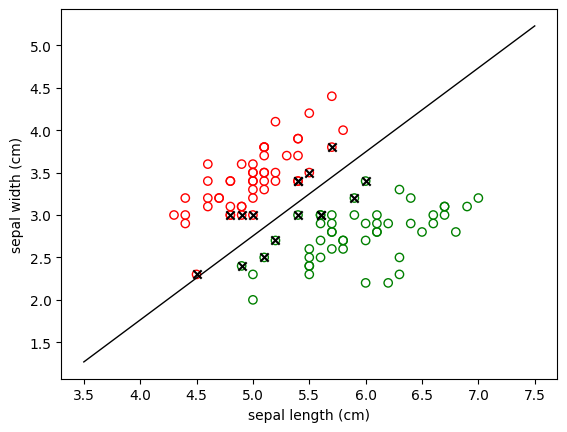

In [3]:
colours = np.repeat(['r'],50)
colours = np.append(colours, np.repeat(['g'],50))
colours = np.append(colours, np.repeat(['b'],50))
fig, ax = plt.subplots()
# Plot data.
scatter = ax.scatter(m.data[0:100, 0], m.data[0:100, 1],
                     facecolors = 'none',
                     edgecolors = colours[0:100])
ax.set(xlabel=m.feature_names[0], ylabel=m.feature_names[1])

# Plot separation line.
xstart = 3.5
temp1 = [xstart, - (s.intercept_ + s.coef_[0][0] * xstart) / s.coef_[0][1]]
xend = 7.5
temp2 = [xend, - (s.intercept_ + s.coef_[0][0] * xend) / s.coef_[0][1]]
plt.plot([temp1[0], temp2[0]], [temp1[1], temp2[1]],
         c = 'k', linewidth =1)
for i in range(s.support_vectors_.shape[0]):
  ax.scatter(s.support_vectors_[i][0], s.support_vectors_[i][1],
             c = 'k', marker = 'x')
plt.show()